In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:

# Define the parameters
fs = 204800  # Sampling frequency in Hz
duration = 60  # Duration in seconds
N = int(fs * duration)  # Number of samples
frequency_band_limit = 3000  # Frequency band of interest in Hz

# Generate a sample signal (you can replace this with your actual data)
t = np.linspace(0, duration, N, endpoint=False)
signal = np.sin(2 * np.pi * 1000 * t) + 0.5 * np.sin(2 * np.pi * 2000 * t)

signal

array([ 0.        ,  0.06133517,  0.12252607, ..., -0.1834289 ,
       -0.12252607, -0.06133517])

In [ ]:

# Apply Rectangle windowing (no windowing in this case since it's rectangle)
windowed_signal = signal * np.ones_like(signal)

# Perform FFT
fft_result = np.fft.fft(windowed_signal)
fft_freqs = np.fft.fftfreq(N, d=1/fs)

# Calculate the magnitude of the FFT and normalize
fft_magnitude = np.abs(fft_result) / N

# Limit to the frequency band of interest
freq_mask = (fft_freqs >= 0) & (fft_freqs <= frequency_band_limit)
limited_fft_freqs = fft_freqs[freq_mask]
limited_fft_magnitude = fft_magnitude[freq_mask]


In [ ]:
fft_freqs

array([ 0.        ,  0.01666667,  0.03333333, ..., -0.05      ,
       -0.03333333, -0.01666667])

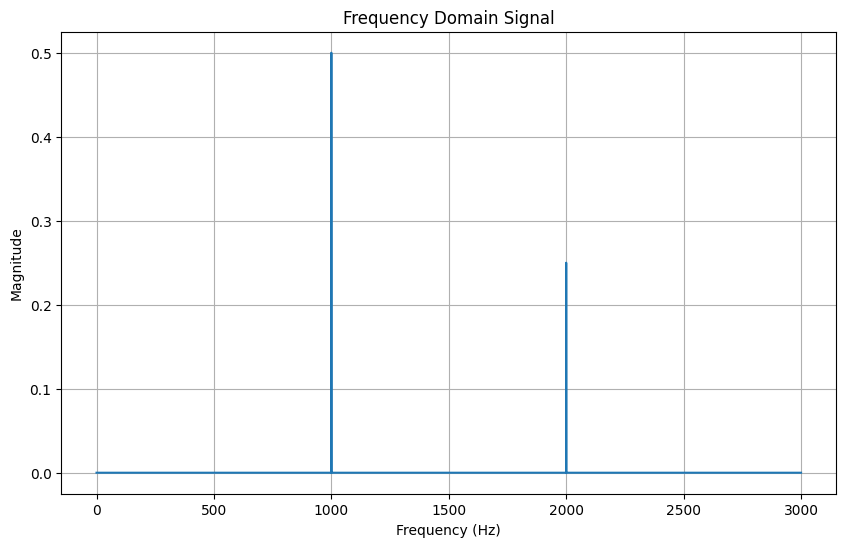

In [ ]:

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(limited_fft_freqs, limited_fft_magnitude)
plt.title('Frequency Domain Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

In [ ]:

def calculate_1_3_octave_levels(frequencies, magnitudes, ref_pressure=20e-6):
    # Define the center frequencies for 1/3 octave bands
    center_frequencies = [
        12.5, 16, 20, 25, 31.5, 40, 50, 63, 80, 100, 125, 160, 200, 250, 315, 400, 500, 630, 800, 1000,
        1250, 1600, 2000, 2500, 3150, 4000, 5000, 6300, 8000, 10000, 12500, 16000, 20000
    ]

    # Calculate the lower and upper limits for each 1/3 octave band
    lower_limits = [f / (2**(1/6)) for f in center_frequencies]
    upper_limits = [f * (2**(1/6)) for f in center_frequencies]

    # Initialize an array to store the SPL values for each band
    spl_values = []

    # Compute the sound pressure level for each 1/3 octave band
    for lower, upper in zip(lower_limits, upper_limits):
        # Find indices corresponding to the current 1/3 octave band
        band_indices = (frequencies >= lower) & (frequencies < upper)

        # Calculate the RMS pressure in the band
        band_rms_pressure = np.sqrt(np.sum(magnitudes[band_indices]**2))

        # Convert to sound pressure level (SPL)
        if band_rms_pressure > 0:
            band_spl = 20 * np.log10(band_rms_pressure / ref_pressure)
        else:
            band_spl = -np.inf  # If no energy in this band, set SPL to negative infinity

        spl_values.append(band_spl)

    return center_frequencies, spl_values


# Use the FFT results from the previous code
frequencies = fft_freqs
magnitudes = fft_magnitude
#frequencies = limited_fft_freqs
#magnitudes = limited_fft_magnitude

# Calculate 1/3 octave band SPL
center_freqs, spl_levels = calculate_1_3_octave_levels(frequencies, magnitudes)


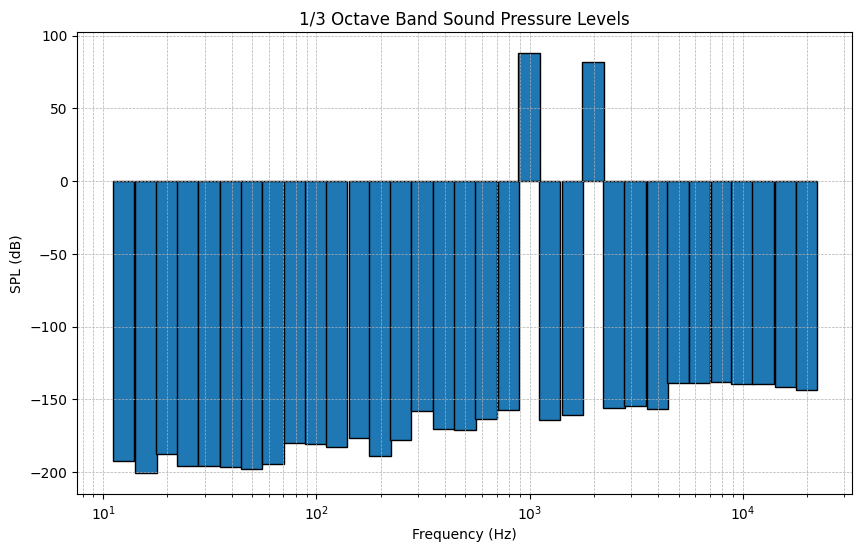

In [ ]:

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(center_freqs, spl_levels, width=[f * (2**(1/6) - 1/(2**(1/6))) for f in center_freqs], edgecolor='k')
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('SPL (dB)')
plt.title('1/3 Octave Band Sound Pressure Levels')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()